In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Student_Marks.csv')
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


* So there are only three columns in the dataset. The marks column is the target column as we have to predict the marks of a student.

* Now before moving forward, let’s have a look at whether this dataset contains any null values or not:

In [4]:
## missing values 

data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

* The dataset is ready to use because there are no null values in the data. There is a column in the data containing information about the number of courses students have chosen. Let’s look at the number of values of all values of this column:



In [5]:
data["number_courses"].value_counts()

number_courses
3    22
4    21
6    16
8    16
7    15
5    10
Name: count, dtype: int64

* So there are a minimum of three and a maximum of eight courses students have chosen. Let’s have a look at a scatter plot to see whether the number of courses affects the marks of a student:


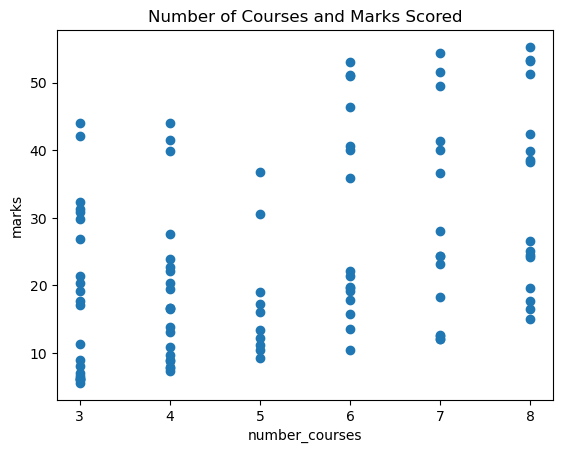

In [18]:
plt.scatter(data=data, x = "number_courses", 
                    y = "Marks") 
plt.title("Number of Courses and Marks Scored")
plt.xlabel('number_courses')
plt.ylabel('marks')
plt.show()

* According to the above data visualization, we can say that the number of courses may not affect the marks of a student if the student is studying for more time daily. So let’s have a look at the relationship between the time a studied daily and the marks scored by the student:

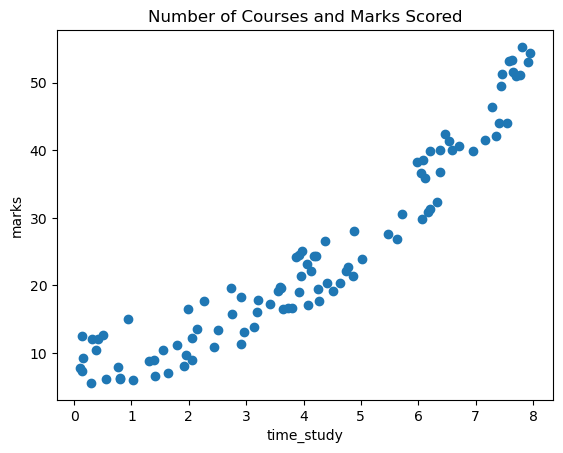

In [20]:
plt.scatter(data=data, x = "time_study", 
                    y = "Marks") 
plt.title("Number of Courses and Marks Scored")
plt.xlabel('time_study')
plt.ylabel('marks')
plt.show()

* You can see that there is a linear relationship between the time studied and the marks obtained. This means the more time students spend studying, the better they can score.

Now let’s have a look at the correlation between the marks scored by the students and the other two columns in the data:

In [21]:
correlation = data.corr()
print(correlation["Marks"].sort_values(ascending=False))

Marks             1.000000
time_study        0.942254
number_courses    0.417335
Name: Marks, dtype: float64


* So the time_studied column is more correlated with the marks column than the other column.



## Student Marks Prediction Model
* Now let’s move to the task of training a machine learning model for predicting the marks of a student. Here, I will first start by splitting the data into training and test sets:

In [27]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
x=data.drop(columns=['Marks'])
y=data['Marks']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)

 * Now I will train a machine learning model using the linear regression algorithm:


In [28]:
model = LinearRegression()

model.fit(xtrain, ytrain)

model.score(xtest, ytest)

0.9417787508612494

* Now let’s test the performance of this machine learning model by giving inputs based on the features we have used to train the model and predict the marks of a student:



In [35]:
# Features = [["time_study", "number_courses"]]

features = np.array([[7.811, 8]])

model.predict(features)

array([50.36484423])

* So this is how we can predict the marks of a student with machine learning using Python.

